In [1]:
# Task 1: Load a CSV Dataset
# Description: Load a CSV file into a Pandas DataFrame and print the first five rows to understand the structure of the dataset.

import pandas as pd

# Load the CSV file into a DataFrame
# Replace 'your_dataset.csv' with your actual file path or URL
df = pd.read_csv('/workspaces/AI_DATA_ANALYSIS_/src/Module 3/common_data_errors_example.csv')

# Print the first five rows of the dataset
print(df.head())




   customer_id              email transaction_date department supplier_name  \
0            1  user1@example.com       2024-07-22         IT    Supplier 0   
1            2  user2@example.com       2024-11-26         HR    Supplier 1   
2            3  user3@example.com       2024-04-05         HR    Supplier 2   
3            4  user4@example.com       2024-12-13         IT    Supplier 3   
4            5  user5@example.com       2024-11-15      Sales    Supplier 4   

  product_id date_column           phone       state month  revenue quarter  \
0         P1  06/23/2024  (555) 123-1000      Calif.   Jun     4174      Q4   
1         P2  2024-06-27    555-123-1001      Calif.   Jun     4507      Q4   
2         P3  2024-07-05    555-123-1002  California   Jan     1860      Q3   
3         P4  06/26/2024    555-123-1003      Calif.   Jan     2294      Q4   
4         P5  2024-06-10  (555) 123-1004      Calif.   Feb     2130      Q3   

   engagement_score       price  
0          0.842

In [2]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.

# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter and display only the columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
email               10
transaction_date    14
department          26
dtype: int64


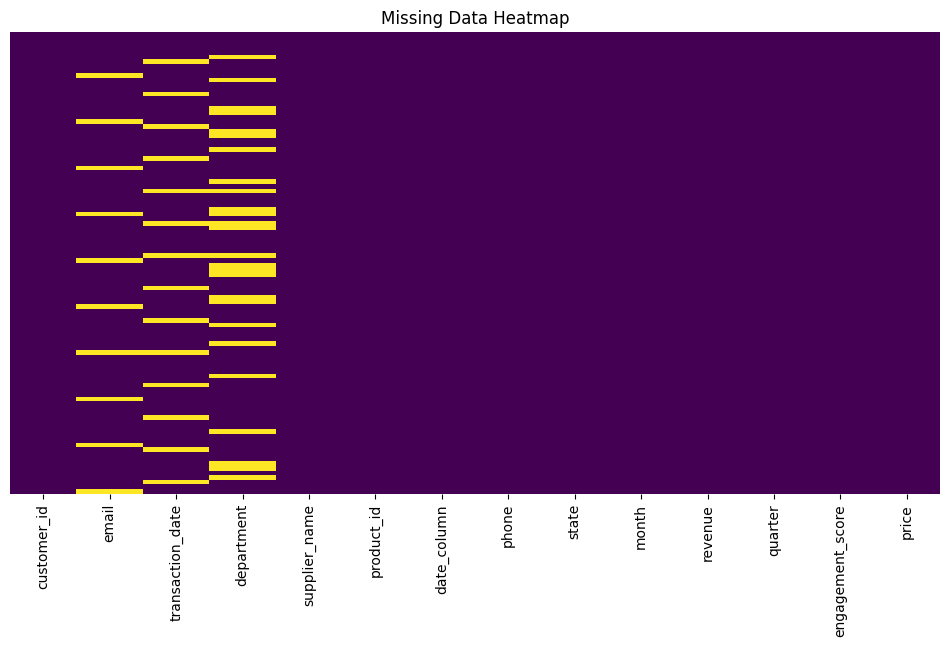

In [3]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.



import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)

# Title for clarity
plt.title("Missing Data Heatmap")
plt.show()


In [4]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.

# Calculate the threshold: 50% of the total number of rows
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Display the remaining columns
print("Remaining columns after dropping:")
print(df_cleaned.columns)



Remaining columns after dropping:
Index(['customer_id', 'email', 'transaction_date', 'department',
       'supplier_name', 'product_id', 'date_column', 'phone', 'state', 'month',
       'revenue', 'quarter', 'engagement_score', 'price'],
      dtype='object')


In [5]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.

# Find duplicate rows
duplicates = df_cleaned[df_cleaned.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicates)

# Count of duplicate rows
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")



Duplicate rows:
Empty DataFrame
Columns: [customer_id, email, transaction_date, department, supplier_name, product_id, date_column, phone, state, month, revenue, quarter, engagement_score, price]
Index: []

Number of duplicate rows: 0


In [6]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.


# Remove duplicate rows
df_no_duplicates = df_cleaned.drop_duplicates()

# Verify by checking if any duplicates remain
duplicates_after = df_no_duplicates.duplicated().sum()

print(f"Number of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


In [7]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.


# Select categorical columns (object dtype)
categorical_cols = df_no_duplicates.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in column '{col}':")
    
    # Get unique values stripped of spaces and lowered for case normalization
    normalized_values = df_no_duplicates[col].dropna().map(lambda x: x.strip().lower()).unique()
    
    # Original unique values
    original_values = df_no_duplicates[col].dropna().unique()
    
    # Print original unique values to manually inspect inconsistencies
    print(original_values)
    
    # If you want, also print normalized unique values for comparison
    # print("Normalized values:", normalized_values)



Unique values in column 'email':
['user1@example.com' 'user2@example.com' 'user3@example.com'
 'user4@example.com' 'user5@example.com' 'user6@example.com'
 'user7@example.com' 'user8@example.com' 'user9@example.com'
 'user11@example.com' 'user12@example.com' 'user13@example.com'
 'user14@example.com' 'user15@example.com' 'user16@example.com'
 'user17@example.com' 'user18@example.com' 'user19@example.com'
 'user21@example.com' 'user22@example.com' 'user23@example.com'
 'user24@example.com' 'user25@example.com' 'user26@example.com'
 'user27@example.com' 'user28@example.com' 'user29@example.com'
 'user31@example.com' 'user32@example.com' 'user33@example.com'
 'user34@example.com' 'user35@example.com' 'user36@example.com'
 'user37@example.com' 'user38@example.com' 'user39@example.com'
 'user41@example.com' 'user42@example.com' 'user43@example.com'
 'user44@example.com' 'user45@example.com' 'user46@example.com'
 'user47@example.com' 'user48@example.com' 'user49@example.com'
 'user51@exampl

In [8]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.


# Total records (rows) in the cleaned dataset
total_records = df_no_duplicates.shape[0]

# Number of duplicate rows before removal (if you kept original df)
duplicate_rows = df_cleaned.duplicated().sum()

# Columns with missing values and counts
missing_values = df_no_duplicates.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Print summary
print("=== Data Quality Summary ===")
print(f"Total records (rows): {total_records}")
print(f"Duplicate rows (before removal): {duplicate_rows}")
print("\nColumns with missing values:")
print(missing_columns if not missing_columns.empty else "No missing values detected.")


=== Data Quality Summary ===
Total records (rows): 100
Duplicate rows (before removal): 0

Columns with missing values:
email               10
transaction_date    14
department          26
dtype: int64


In [9]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.

# 1. Missing values summary
missing_values = df_no_duplicates.isnull().sum()
missing_summary = missing_values[missing_values > 0]

# 2. Basic statistics for numerical columns
numerical_stats = df_no_duplicates.describe()

# 3. Distribution for categorical columns
categorical_cols = df_no_duplicates.select_dtypes(include=['object']).columns

print("=== Data Quality Report ===\n")

print("1. Missing Values per Column:")
if not missing_summary.empty:
    print(missing_summary)
else:
    print("No missing values detected.")
print("\n" + "-"*50 + "\n")

print("2. Numerical Columns Basic Statistics:")
print(numerical_stats)
print("\n" + "-"*50 + "\n")

print("3. Categorical Columns Distribution:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df_no_duplicates[col].value_counts(dropna=False))



=== Data Quality Report ===

1. Missing Values per Column:
email               10
transaction_date    14
department          26
dtype: int64

--------------------------------------------------

2. Numerical Columns Basic Statistics:
       customer_id      revenue  engagement_score       price
count   100.000000   100.000000        100.000000  100.000000
mean     50.500000  3132.320000          0.485487  288.587392
std      29.011492  1118.566966          0.276919  133.207652
min       1.000000  1021.000000          0.000520   18.856928
25%      25.750000  2207.250000          0.264103  181.365398
50%      50.500000  3191.500000          0.453144  282.240703
75%      75.250000  4077.750000          0.695713  404.317739
max     100.000000  4943.000000          0.997740  498.164313

--------------------------------------------------

3. Categorical Columns Distribution:

Column: email
email
NaN                   10
user1@example.com      1
user63@example.com     1
user73@example.com     

In [10]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.



# Separate numerical and categorical columns
numerical_cols = df_no_duplicates.select_dtypes(include=['number']).columns
categorical_cols = df_no_duplicates.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
for col in numerical_cols:
    mean_value = df_no_duplicates[col].mean()
    df_no_duplicates[col].fillna(mean_value, inplace=True)

# Impute categorical columns with mode
for col in categorical_cols:
    mode_value = df_no_duplicates[col].mode()
    if not mode_value.empty:
        df_no_duplicates[col].fillna(mode_value[0], inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(df_no_duplicates.isnull().sum())


Missing values after imputation:
customer_id         0
email               0
transaction_date    0
department          0
supplier_name       0
product_id          0
date_column         0
phone               0
state               0
month               0
revenue             0
quarter             0
engagement_score    0
price               0
dtype: int64
